# Day 6

## part 1

- The guard goes forward until they hit a wall, then turns right
- count the number of distinct positions until the guard leaves the map

In [9]:
from copy import deepcopy
import logging
from itertools import count

from matplotlib import pyplot as plt

from advent_of_code_utils.advent_of_code_utils import (
    parse_from_file, ParseConfig as PC, markdown, plot_grid
)

log = logging.getLogger('day 6')
logging.basicConfig(level=logging.INFO)

In [2]:
parser = PC('\n', PC('', str))

puzzle_grid = parse_from_file('day_6.txt', parser)

log.info(
    f'loaded puzzle grid with {len(puzzle_grid)} rows and '
    f'{len(puzzle_grid[0])} cols'
)

INFO:advent_of_code_utils.py:130 items loaded from "day_6.txt"
INFO:day 6:loaded puzzle grid with 130 rows and 130 cols


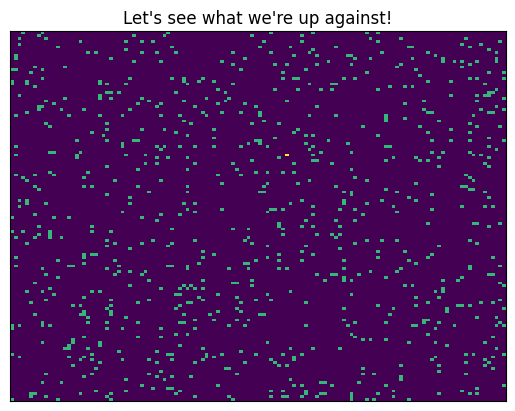

In [6]:
lut = {
    '.': 0, 'X': 1, '#': 2, '^': 3, '>': 3, 'v': 3, '<': 3,
}

def plot_state(grid: list[list[str]], ax: plt.Axes) -> None:
    """converts a puzzle grid to ints and then plots it"""
    converted = [[lut[c] for c in line] for line in grid]
    plot_grid(converted, ax)

fig, ax = plt.subplots()
ax.set_title('Let\'s see what we\'re up against!')
plot_state(puzzle_grid, ax)

INFO:day 6:Found guard='^' at (43, 72)
INFO:day 6:guard out of bounds after step=5760!


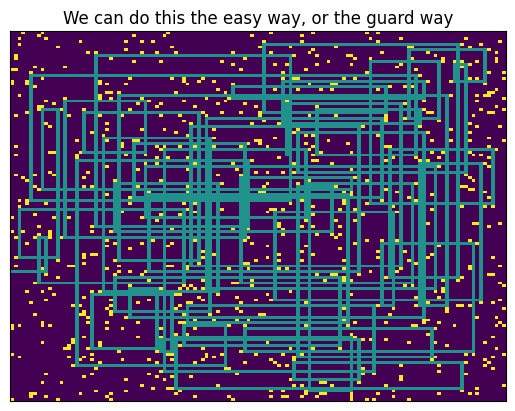

In [10]:
offsets = {
    '^': (-1, 0),
    '>': (0, 1),
    'v': (1, 0),
    '<': (0, -1),
}

turn_right = {
    '^': '>',
    '>': 'v',
    'v': '<',
    '<': '^',
}

def in_bounds(grid: list[list], line: int, char: int) -> bool:
    """Returns True if within grid bounds"""
    return 0 <= line < len(grid) and 0 <= char <= len(grid[0])

def trace_path(puzzle_grid: list[list[str]]) -> list[list[list[str]]]:
    """
    traces the route of the guard, storing each step with a few to plotting
    """
    # first let's find the guard
    guard = '^'
    for line_index, line in enumerate(puzzle_grid):
        if guard in line:
            char_index = line.index(guard)
            break
    loc = (line_index, char_index)
    log.info(f'Found {guard=} at {loc}')

    # ok now we can plot the guard's path
    frames = [deepcopy(puzzle_grid)]
    grid = deepcopy(puzzle_grid)
    for step in count():
        log.debug(f'{step=}: {guard=} at {loc}')
        grid[loc[0]][loc[1]] = 'X'  # replace guard with X
        # check we won't crash into a wall or leave the grid
        next_loc = [val + off for val, off in zip(loc, offsets[guard])]
        if not in_bounds(grid, *next_loc):
            break
        elif grid[next_loc[0]][next_loc[1]] == '#':
            guard = turn_right[guard]
            log.debug(f'{step=}: Hit a #! {guard=}')
        else:
            loc = next_loc
        # if go this far we won't leave so let's update the grid
        grid[loc[0]][loc[1]] = guard
        frames.append(grid)

    log.info(f'guard out of bounds after {step=}!')
    return frames

frames = trace_path(puzzle_grid)
fig, ax = plt.subplots()
ax.set_title('We can do this the easy way, or the guard way')
plot_state(frames[1], ax)

In [11]:
# so solving...
total_covered = sum([line.count('X') for line in frames[-1]])
markdown(f'The total tiles covered by the guard is: {total_covered}')

The total tiles covered by the guard is: 5101